# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11822 entries, 0 to 11821
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11822 non-null  int64  
 1   App             11822 non-null  object 
 2   Category        11822 non-null  object 
 3   Rating          11822 non-null  float64
 4   Reviews         11822 non-null  float64
 5   Size            11822 non-null  float64
 6   Installs        11822 non-null  float64
 7   Content Rating  11822 non-null  object 
 8   Genres          11822 non-null  object 
 9   lastupdate      11822 non-null  int64  
 10  is_free         11822 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1016.1+ KB


In [4]:
df.drop(['Unnamed: 0', 'App'], axis=1, inplace=True)
df.reset_index(drop=True)

,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,lastupdate,is_free
0,ART_AND_DESIGN,4.1,159.0,19.00000,10000.0,Everyone,Art & Design,-213,1
1,ART_AND_DESIGN,3.9,967.0,14.00000,500000.0,Everyone,Art & Design;Pretend Play,-205,1
2,ART_AND_DESIGN,4.7,87510.0,8.70000,5000000.0,Everyone,Art & Design,-7,1
3,ART_AND_DESIGN,4.5,215644.0,25.00000,50000000.0,Teen,Art & Design,-61,1
4,ART_AND_DESIGN,4.3,967.0,2.80000,100000.0,Everyone,Art & Design;Creativity,-49,1
...,...,...,...,...,...,...,...,...,...
11817,TOOLS,3.3,2385.0,23.31734,10000.0,Everyone,Tools,-1775,0
11818,VIDEO_PLAYERS,3.8,668.0,23.31734,5000000.0,Everyone,Video Players & Editors,-1093,1
11819,SOCIAL,4.2,1218.0,3.50000,100000.0,Everyone,Social,-1423,1
11820,PRODUCTIVITY,3.3,13296.0,33.00000,500000.0,Everyone,Productivity,-336,0


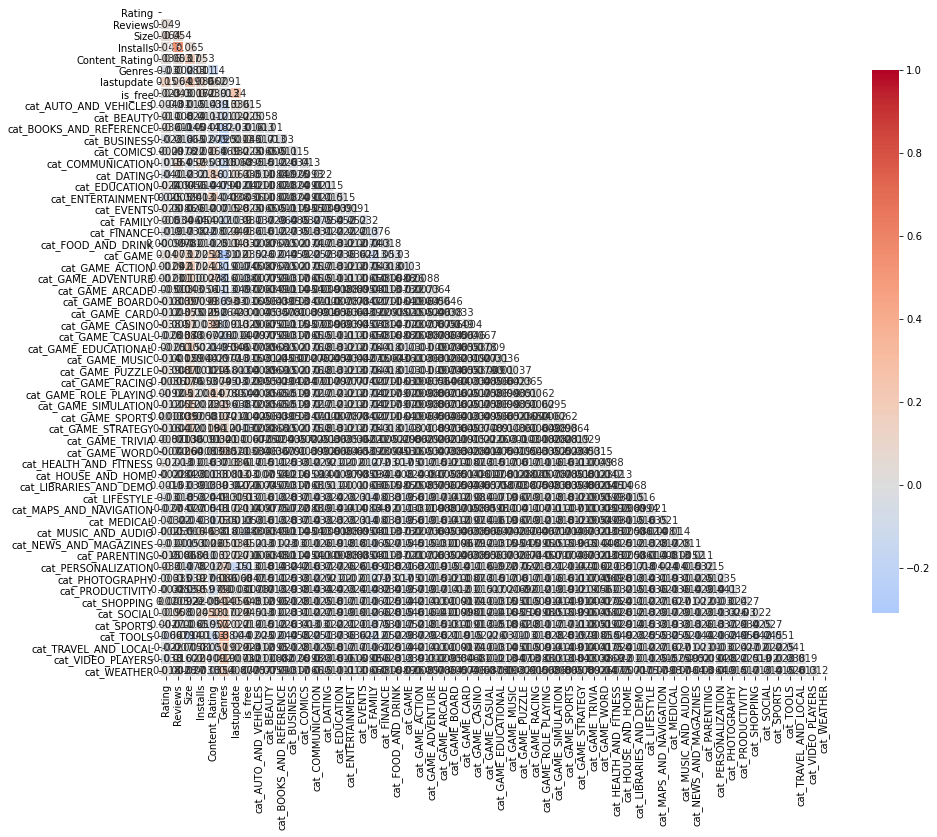

In [30]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

Clearly, the data needs a lot of preprocessing to improve the results. Here you can see the relationship between 'Rating' and the independent variables. We can see what variables are continuous(Reviews, Size, and Installs) and categorical(Category, Content Rating, and Month).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11822 entries, 0 to 11821
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        11822 non-null  object 
 1   Rating          11822 non-null  float64
 2   Reviews         11822 non-null  float64
 3   Size            11822 non-null  float64
 4   Installs        11822 non-null  float64
 5   Content Rating  11822 non-null  object 
 6   Genres          11822 non-null  object 
 7   lastupdate      11822 non-null  int64  
 8   is_free         11822 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 831.4+ KB


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

# le = preprocessing.LabelEncoder()
# df['App'] = le.fit_transform(df['App'])

df = pd.concat([df, pd.get_dummies(df['Category'], prefix=('cat'), drop_first=True)], axis=1)
# df = df.drop(columns=['cat_0'], axis=1)

In [7]:
df.drop(columns=['Category'], axis = 1, inplace=True)

In [8]:
df.columns = df.columns.str.replace(' ', '_')

# Linear Regression Model

Multiple linear regression is a great way to predict the value of a dependent based on the values of multiple independent values. Here we want to see the relationship between the value of installs versus the values of all the dependent variables.

In [9]:
model_df = df.copy()

In [83]:
model_df.to_csv('model_data.csv')

In [11]:
outcome = 'Installs'
predictors = model_df.drop(labels=['Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_df).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Rating+Reviews+Size+Content_Rating+Genres+lastupdate+is_free+cat_AUTO_AND_VEHICLES+cat_BEAUTY+cat_BOOKS_AND_REFERENCE+cat_BUSINESS+cat_COMICS+cat_COMMUNICATION+cat_DATING+cat_EDUCATION+cat_ENTERTAINMENT+cat_EVENTS+cat_FAMILY+cat_FINANCE+cat_FOOD_AND_DRINK+cat_GAME+cat_GAME_ACTION+cat_GAME_ADVENTURE+cat_GAME_ARCADE+cat_GAME_BOARD+cat_GAME_CARD+cat_GAME_CASINO+cat_GAME_CASUAL+cat_GAME_EDUCATIONAL+cat_GAME_MUSIC+cat_GAME_PUZZLE+cat_GAME_RACING+cat_GAME_ROLE_PLAYING+cat_GAME_SIMULATION+cat_GAME_SPORTS+cat_GAME_STRATEGY+cat_GAME_TRIVIA+cat_GAME_WORD+cat_HEALTH_AND_FITNESS+cat_HOUSE_AND_HOME+cat_LIBRARIES_AND_DEMO+cat_LIFESTYLE+cat_MAPS_AND_NAVIGATION+cat_MEDICAL+cat_MUSIC_AND_AUDIO+cat_NEWS_AND_MAGAZINES+cat_PARENTING+cat_PERSONALIZATION+cat_PHOTOGRAPHY+cat_PRODUCTIVITY+cat_SHOPPING+cat_SOCIAL+cat_SPORTS+cat_TOOLS+cat_TRAVEL_AND_LOCAL+cat_VIDEO_PLAYERS+cat_WEATHER


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     99.49
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:23:04   Log-Likelihood:            -2.2567e+05
No. Observations:               11822   AIC:                         4.515e+05
Df Residuals:                   11764   BIC:                         4.519e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.216e+07   6.98e+06     -1.742      0.081   -2.58e+07    1.52e+06
Rating                   1.706e+06   8.48e+05      2.012      0.044    4.38e+04    3.37e+06
Reviews                    17.8144      0.254     70.148      0.000      17.317      18.312
Size                     6.461e+04   1.56e+04      4.148      0.000    3.41e+04    9.51e+04
Content_Rating           1.444e+06   4.85e+05      2.978      0.003    4.94e+05    2.39e+06
Genres                  -4.942e+04   2.83e+04     -1.745      0.081   -1.05e+05    6105.684
lastupdate               4433.2479   1052.531      4.212      0.000    2370.114    6496.382
is_free                   6.23e+06   1.41e+06      4.428      0.000    3.47e+06    8.99e+06
cat_AUTO_AND_VEHICLES   -2.356e+06   7.62e+06     -0.309      0.757   -1.73e+07    1.26e+07
cat_BEAUTY              -2.616e+06   8.67e+06     -0.302      0.763   -1.96e+07    1.44e+07
cat_BOOKS_AND_REFERENCE  5.283e+06   6.46e+06      0.817      0.414   -7.39e+06     1.8e+07
cat_BUSINESS             1.501e+06   6.18e+06      0.243      0.808   -1.06e+07    1.36e+07
cat_COMICS              -2.522e+06   8.26e+06     -0.305      0.760   -1.87e+07    1.37e+07
cat_COMMUNICATION        2.502e+07   6.33e+06      3.955      0.000    1.26e+07    3.74e+07
cat_DATING               -3.27e+06   6.82e+06     -0.479      0.632   -1.66e+07    1.01e+07
cat_EDUCATION            1.439e+06   6.83e+06      0.211      0.833    -1.2e+07    1.48e+07
cat_ENTERTAINMENT        8.994e+06   6.92e+06      1.299      0.194   -4.57e+06    2.26e+07
cat_EVENTS              -9.909e+05   8.33e+06     -0.119      0.905   -1.73e+07    1.53e+07
cat_FAMILY               6.623e+05   6.01e+06      0.110      0.912   -1.11e+07    1.24e+07
cat_FINANCE               1.58e+06   6.42e+06      0.246      0.806    -1.1e+07    1.42e+07
cat_FOOD_AND_DRINK       8.181e+05   7.36e+06      0.111      0.912   -1.36e+07    1.53e+07
cat_GAME                -7.554e+05   6.01e+06     -0.126      0.900   -1.25e+07     1.1e+07
cat_GAME_ACTION         -1.062e+06   7.36e+06     -0.144      0.885   -1.55e+07    1.34e+07
cat_GAME_ADVENTURE       5.582e+05   7.69e+06      0.073      0.942   -1.45e+07    1.56e+07
cat_GAME_ARCADE          1.061e+07   8.36e+06      1.269      0.204   -5.78e+06     2.7e+07
cat_GAME_BOARD           1.035e+07   8.97e+06      1.154      0.249   -7.23e+06    2.79e+07
cat_GAME_CARD           -2.601e+06   1.02e+07     -0.255      0.799   -2.26e+07    1.74e+07
cat_GAME_CASINO         -4.775e+06   8.26e+06     -0.578      0.563    -2.1e+07    1.14e+07
cat_GAME_CASUAL          8.686e+06   7.64e+06      1.137      0.256   -6.29e+06    2.37e+07
cat_GAME_EDUCATIONAL     6.016e+06    7.3e+06      0.824      0.410   -8.29e+06    2.03e+07
cat_GAME_MUSIC           1.057e+07   1.37e+07  

R^2 represents the proportion of the variance in the dependent variable that can be explained by the independents variables. Here it is .325 which isn't a great score. We want at least 50%. 

In [12]:
y = model_df['Installs']
X = model_df.drop(labels=['Installs'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [15]:
accuracy = mlr.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 33.05%'

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

y_hat_test = mlr.predict(X_test)

test_residuals = y_hat_test - y_test

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 11680252.440382594
Test Mean Squared Error: 2833412324333610.0
Root Mean Squared Error Test: 53229806.728313506


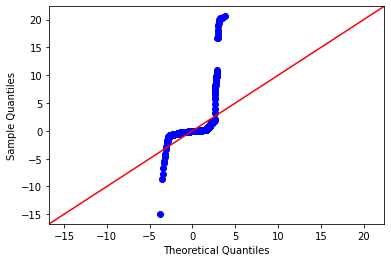

In [17]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## KNeighbors Regression

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

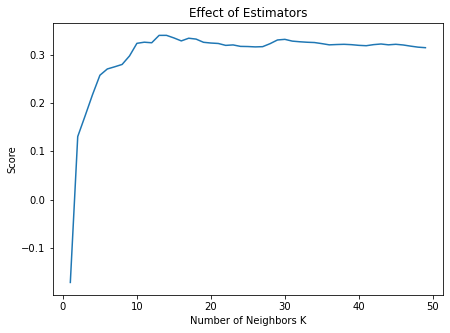

In [20]:
n_neighbors = np.arange(1, 50, 1)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [21]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])
# knn = KNeighborsRegressor(n_neighbors=14)
# knn.fit(X_train,y_train)
# accuracy = knn.score(X_test, y_test)
# 'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

max accuracy is:  0.3396112071201155
K value to achieve this result:  14


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

In [25]:
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [26]:
accuracy = decision_tree.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 22.79%'

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

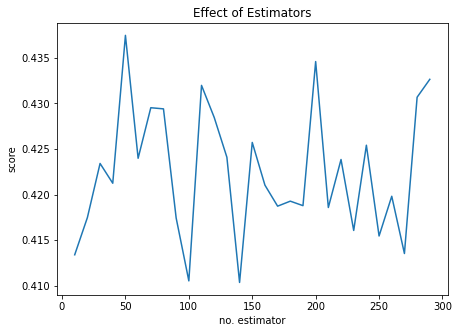

In [28]:
rf = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [31]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])

max accuracy is:  0.4374521400831123
Estimators to achieve this result:  50


**Observations**
Out of all the models Random Forest has the highest accuracy sitting at 43.7%. Although it's not a great start, it stills a start that can be tweak with a little more cleaning of the data. 

# Outliers

In [32]:
model_df = df.copy()

In [33]:
from numpy import mean
from numpy import std

<AxesSubplot:xlabel='Reviews'>

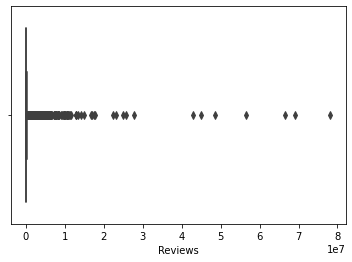

In [34]:
sns.boxplot(x=model_df['Reviews'])

In [35]:
def outliers(col, df):
    mean = df[col].mean()
    std = df[col].std()
    cut_off = std * 3
    lower = mean - cut_off
    upper = mean + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    return sorted(outliers)

In [36]:
outliers('Reviews', model_df)

[5456208.0,
 5465624.0,
 5566669.0,
 5591653.0,
 5637451.0,
 5745093.0,
 5783441.0,
 5793284.0,
 5853882.0,
 5916606.0,
 5945403.0,
 6012719.0,
 6074334.0,
 6120977.0,
 6181640.0,
 6198563.0,
 6207063.0,
 6210998.0,
 6289924.0,
 6427773.0,
 6466641.0,
 6474426.0,
 6702776.0,
 7165362.0,
 7232629.0,
 7269651.0,
 7464996.0,
 7529865.0,
 7594559.0,
 7614130.0,
 7671249.0,
 7790693.0,
 7820209.0,
 8033493.0,
 8118609.0,
 8118880.0,
 8190074.0,
 8219586.0,
 8389714.0,
 8606259.0,
 8923587.0,
 9235155.0,
 9642995.0,
 9742394.0,
 9879473.0,
 9881829.0,
 9882639.0,
 10053186.0,
 10055521.0,
 10216538.0,
 10424925.0,
 10484169.0,
 10485308.0,
 10790289.0,
 10858556.0,
 10979062.0,
 11334799.0,
 11667403.0,
 12759663.0,
 12809894.0,
 12842860.0,
 13479633.0,
 14198297.0,
 14891223.0,
 16771865.0,
 17014787.0,
 17453760.0,
 17712922.0,
 22426677.0,
 23133508.0,
 24900999.0,
 25655305.0,
 27722264.0,
 42916526.0,
 44891723.0,
 48432492.0,
 56642847.0,
 66577313.0,
 69119316.0,
 78158306.0]

In [37]:
model_out = model_df[(model_df['Reviews'] <= 5456208.0) & (model_df['Reviews'] > 10)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,4.1,159.0,19.00000,10000.0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.00000,500000.0,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.70000,5000000.0,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25.00000,50000000.0,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.80000,100000.0,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,3.3,2385.0,23.31734,10000.0,1,109,-1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10408,3.8,668.0,23.31734,5000000.0,1,115,-1093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10409,4.2,1218.0,3.50000,100000.0,1,102,-1423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10410,3.3,13296.0,33.00000,500000.0,1,83,-336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Installs'>

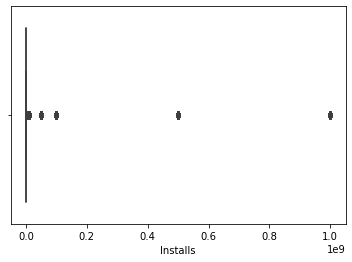

In [38]:
sns.boxplot(x=model_df['Installs'])

In [39]:
outliers('Installs', model_out)

[500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 500000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0]

In [40]:
model_out = model_out[(model_out['Installs'] < 500000000) & (model_out['Installs'] >= 10)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,4.1,159.0,19.00000,10000.0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.00000,500000.0,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.70000,5000000.0,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25.00000,50000000.0,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.80000,100000.0,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,3.3,2385.0,23.31734,10000.0,1,109,-1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10258,3.8,668.0,23.31734,5000000.0,1,115,-1093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10259,4.2,1218.0,3.50000,100000.0,1,102,-1423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10260,3.3,13296.0,33.00000,500000.0,1,83,-336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Size'>

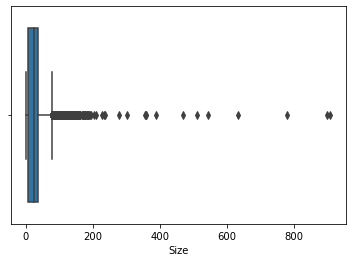

In [42]:
sns.boxplot(x=model_out['Size'])

In [43]:
outliers('Size', model_out)

[131.0,
 131.0,
 132.0,
 132.0,
 133.0,
 133.0,
 133.0,
 134.0,
 135.0,
 135.0,
 135.0,
 135.0,
 136.0,
 136.0,
 136.0,
 138.0,
 139.0,
 139.0,
 140.0,
 140.0,
 140.0,
 141.0,
 141.0,
 142.0,
 142.0,
 143.0,
 143.0,
 143.0,
 143.0,
 143.0,
 143.0,
 143.0,
 143.0,
 145.0,
 145.0,
 145.0,
 145.0,
 147.0,
 147.0,
 147.0,
 147.0,
 147.0,
 148.0,
 149.0,
 149.0,
 149.0,
 149.0,
 149.0,
 149.0,
 150.0,
 151.0,
 151.0,
 151.0,
 151.0,
 152.0,
 152.0,
 152.0,
 153.0,
 154.0,
 154.0,
 154.0,
 156.0,
 156.0,
 156.0,
 156.0,
 157.0,
 157.0,
 157.0,
 158.0,
 159.0,
 159.0,
 159.0,
 159.0,
 159.0,
 159.0,
 161.0,
 161.0,
 162.0,
 163.0,
 163.0,
 163.0,
 168.0,
 169.0,
 170.0,
 170.0,
 171.0,
 171.0,
 171.0,
 172.0,
 172.0,
 173.0,
 174.0,
 175.0,
 176.0,
 177.0,
 178.0,
 181.0,
 181.0,
 183.0,
 184.0,
 184.0,
 184.0,
 186.0,
 188.0,
 191.0,
 193.0,
 202.0,
 210.0,
 226.0,
 232.0,
 237.0,
 279.0,
 302.0,
 357.0,
 358.0,
 358.0,
 389.0,
 470.0,
 512.0,
 543.0,
 633.0,
 780.0,
 898.0,
 909.0]

In [44]:
model_out = model_out[(model_out['Size'] < 131)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,4.1,159.0,19.00000,10000.0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.00000,500000.0,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.70000,5000000.0,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25.00000,50000000.0,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.80000,100000.0,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,3.3,2385.0,23.31734,10000.0,1,109,-1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10134,3.8,668.0,23.31734,5000000.0,1,115,-1093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10135,4.2,1218.0,3.50000,100000.0,1,102,-1423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10136,3.3,13296.0,33.00000,500000.0,1,83,-336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Rating'>

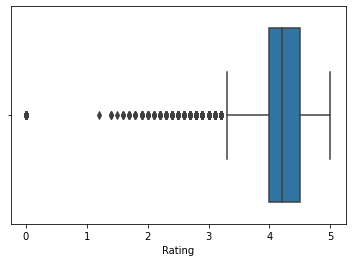

In [45]:
sns.boxplot(x=model_out['Rating'])

The median looks to be around 4.3. Anything beyond 3.3 and 5 are outliers. We will use these as our markers.

In [46]:
model_out = model_out[(model_out['Rating'] > 3)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,4.1,159.0,19.00000,10000.0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.00000,500000.0,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.70000,5000000.0,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25.00000,50000000.0,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.80000,100000.0,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,3.3,2385.0,23.31734,10000.0,1,109,-1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9787,3.8,668.0,23.31734,5000000.0,1,115,-1093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9788,4.2,1218.0,3.50000,100000.0,1,102,-1423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9789,3.3,13296.0,33.00000,500000.0,1,83,-336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
model_out.describe()

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
count,9791.000000,9.791000e+03,9791.000000,9.791000e+03,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.00000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000
mean,4.231413,1.412951e+05,26.254437,6.343253e+06,1.544173,64.789501,-282.591462,0.882239,0.007558,0.004698,0.021550,0.029415,0.006332,0.027576,0.014707,0.01675,0.016852,0.004800,0.155142,0.030334,0.010520,0.089266,0.009601,0.007864,0.005924,0.004290,0.002860,0.006537,0.008477,0.010928,0.001430,0.010418,0.004085,0.010418,0.010418,0.004188,0.010826,0.001021,0.003064,0.026453,0.007149,0.007966,0.030538,0.011950,0.028087,0.005617,0.022061,0.006026,0.040547,0.028291,0.034011,0.021142,0.023389,0.029006,0.076090,0.019916,0.017976,0.009192
std,0.356120,4.542976e+05,25.123320,1.801007e+07,1.074386,34.391814,449.301090,0.322342,0.086612,0.068386,0.145218,0.168975,0.079328,0.163764,0.120385,0.12834,0.128724,0.069121,0.362059,0.171513,0.102031,0.285141,0.097516,0.088336,0.076742,0.065358,0.053403,0.080589,0.091685,0.103972,0.037789,0.101539,0.063790,0.101539,0.101539,0.064579,0.103490,0.031944,0.055272,0.160486,0.084256,0.088904,0.172072,0.108665,0.165230,0.074742,0.146890,0.077397,0.197249,0.165812,0.181266,0.143865,0.151143,0.167832,0.265156,0.139720,0.132870,0.095439
min,3.100000,1.100000e+01,0.008000,1.000000e+01,0.000000,0.000000,-3615.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,4.445000e+02,7.100000,1.000000e+04,1.000000,37.000000,-339.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,7.995000e+03,23.000000,5.000000e+05,1.000000,70.000000,-75.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [48]:
model_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 11821
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   9791 non-null   float64
 1   Reviews                  9791 non-null   float64
 2   Size                     9791 non-null   float64
 3   Installs                 9791 non-null   float64
 4   Content_Rating           9791 non-null   int32  
 5   Genres                   9791 non-null   int32  
 6   lastupdate               9791 non-null   int64  
 7   is_free                  9791 non-null   int64  
 8   cat_AUTO_AND_VEHICLES    9791 non-null   uint8  
 9   cat_BEAUTY               9791 non-null   uint8  
 10  cat_BOOKS_AND_REFERENCE  9791 non-null   uint8  
 11  cat_BUSINESS             9791 non-null   uint8  
 12  cat_COMICS               9791 non-null   uint8  
 13  cat_COMMUNICATION        9791 non-null   uint8  
 14  cat_DATING             

# Model - Outliers Fixed

In [49]:
outcome = 'Installs'
predictors = model_out.drop(labels=['Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_out).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Rating+Reviews+Size+Content_Rating+Genres+lastupdate+is_free+cat_AUTO_AND_VEHICLES+cat_BEAUTY+cat_BOOKS_AND_REFERENCE+cat_BUSINESS+cat_COMICS+cat_COMMUNICATION+cat_DATING+cat_EDUCATION+cat_ENTERTAINMENT+cat_EVENTS+cat_FAMILY+cat_FINANCE+cat_FOOD_AND_DRINK+cat_GAME+cat_GAME_ACTION+cat_GAME_ADVENTURE+cat_GAME_ARCADE+cat_GAME_BOARD+cat_GAME_CARD+cat_GAME_CASINO+cat_GAME_CASUAL+cat_GAME_EDUCATIONAL+cat_GAME_MUSIC+cat_GAME_PUZZLE+cat_GAME_RACING+cat_GAME_ROLE_PLAYING+cat_GAME_SIMULATION+cat_GAME_SPORTS+cat_GAME_STRATEGY+cat_GAME_TRIVIA+cat_GAME_WORD+cat_HEALTH_AND_FITNESS+cat_HOUSE_AND_HOME+cat_LIBRARIES_AND_DEMO+cat_LIFESTYLE+cat_MAPS_AND_NAVIGATION+cat_MEDICAL+cat_MUSIC_AND_AUDIO+cat_NEWS_AND_MAGAZINES+cat_PARENTING+cat_PERSONALIZATION+cat_PHOTOGRAPHY+cat_PRODUCTIVITY+cat_SHOPPING+cat_SOCIAL+cat_SPORTS+cat_TOOLS+cat_TRAVEL_AND_LOCAL+cat_VIDEO_PLAYERS+cat_WEATHER


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     204.8
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:05:16   Log-Likelihood:            -1.7361e+05
No. Observations:                9791   AIC:                         3.473e+05
Df Residuals:                    9733   BIC:                         3.477e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -1.6e+06   2.24e+06     -0.714      0.475   -5.99e+06    2.79e+06
Rating                  -7.793e+04   3.61e+05     -0.216      0.829   -7.85e+05    6.29e+05
Reviews                    27.2650      0.284     96.025      0.000      26.708      27.822
Size                      3.76e+04   5966.360      6.302      0.000    2.59e+04    4.93e+04
Content_Rating           9.789e+04   1.35e+05      0.724      0.469   -1.67e+05    3.63e+05
Genres                  -7814.0502   7701.442     -1.015      0.310   -2.29e+04    7282.375
lastupdate               1572.3359    302.311      5.201      0.000     979.743    2164.929
is_free                  4.031e+06   4.08e+05      9.879      0.000    3.23e+06    4.83e+06
cat_AUTO_AND_VEHICLES   -2.438e+06   2.06e+06     -1.182      0.237   -6.48e+06    1.61e+06
cat_BEAUTY              -2.391e+06   2.34e+06     -1.022      0.307   -6.98e+06     2.2e+06
cat_BOOKS_AND_REFERENCE  2.616e+05   1.72e+06      0.152      0.879   -3.11e+06    3.64e+06
cat_BUSINESS            -5.904e+05   1.67e+06     -0.354      0.723   -3.86e+06    2.68e+06
cat_COMICS              -1.753e+06   2.17e+06     -0.808      0.419   -6.01e+06     2.5e+06
cat_COMMUNICATION        1.658e+06   1.69e+06      0.982      0.326   -1.65e+06    4.97e+06
cat_DATING               -2.44e+06   1.84e+06     -1.326      0.185   -6.05e+06    1.17e+06
cat_EDUCATION           -4.779e+05   1.79e+06     -0.267      0.790   -3.99e+06    3.04e+06
cat_ENTERTAINMENT        2.884e+06   1.82e+06      1.585      0.113   -6.82e+05    6.45e+06
cat_EVENTS               -2.27e+06   2.36e+06     -0.964      0.335   -6.89e+06    2.35e+06
cat_FAMILY              -1.706e+06   1.58e+06     -1.079      0.281   -4.81e+06    1.39e+06
cat_FINANCE             -1.022e+06    1.7e+06     -0.600      0.549   -4.36e+06    2.32e+06
cat_FOOD_AND_DRINK      -1.219e+06   1.96e+06     -0.621      0.534   -5.06e+06    2.63e+06
cat_GAME                -2.465e+06   1.58e+06     -1.560      0.119   -5.56e+06    6.32e+05
cat_GAME_ACTION          9.507e+06   1.99e+06      4.776      0.000    5.61e+06    1.34e+07
cat_GAME_ADVENTURE       4.984e+06   2.07e+06      2.410      0.016     9.3e+05    9.04e+06
cat_GAME_ARCADE          9.603e+06   2.21e+06      4.343      0.000    5.27e+06    1.39e+07
cat_GAME_BOARD           3.916e+06   2.42e+06      1.619      0.105   -8.25e+05    8.66e+06
cat_GAME_CARD           -1.959e+05   2.77e+06     -0.071      0.944   -5.63e+06    5.24e+06
cat_GAME_CASINO         -3.593e+05   2.19e+06     -0.164      0.870   -4.66e+06    3.94e+06
cat_GAME_CASUAL          7.999e+06   2.03e+06      3.945      0.000    4.02e+06     1.2e+07
cat_GAME_EDUCATIONAL     7.009e+06   1.94e+06      3.607      0.000     3.2e+06    1.08e+07
cat_GAME_MUSIC           9.634e+06   3.63e+06  

In [50]:
y = model_out['Installs']
X = model_out.drop(labels=['Installs'], axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 51.6%'

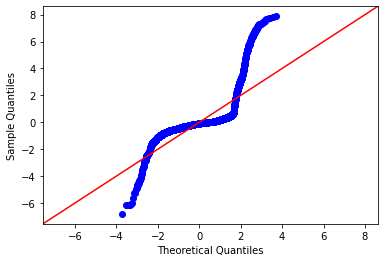

In [53]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## KNeighbors Regression

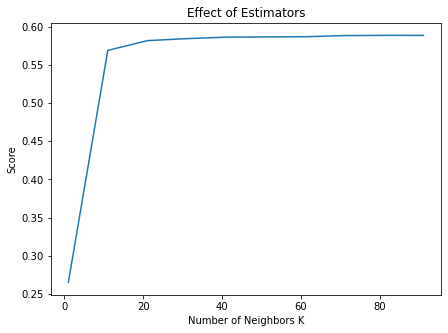

In [54]:
n_neighbors = np.arange(1, 100, 10)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [55]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

max accuracy is:  0.5886441799583777
K value to achieve this result:  81


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=70)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
accuracy = decision_tree.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 23.84%'

# Random Forest

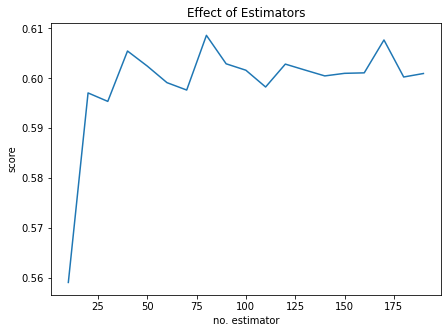

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [59]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])

max accuracy is:  0.6086207058750658
Estimators to achieve this result:  80


# Transform

In [60]:
df_log = model_out.copy()

In [61]:
df_log

,Rating,Reviews,Size,Installs,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,4.1,159.0,19.00000,10000.0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.00000,500000.0,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.70000,5000000.0,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25.00000,50000000.0,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.80000,100000.0,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,3.3,2385.0,23.31734,10000.0,1,109,-1775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11818,3.8,668.0,23.31734,5000000.0,1,115,-1093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11819,4.2,1218.0,3.50000,100000.0,1,102,-1423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11820,3.3,13296.0,33.00000,500000.0,1,83,-336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


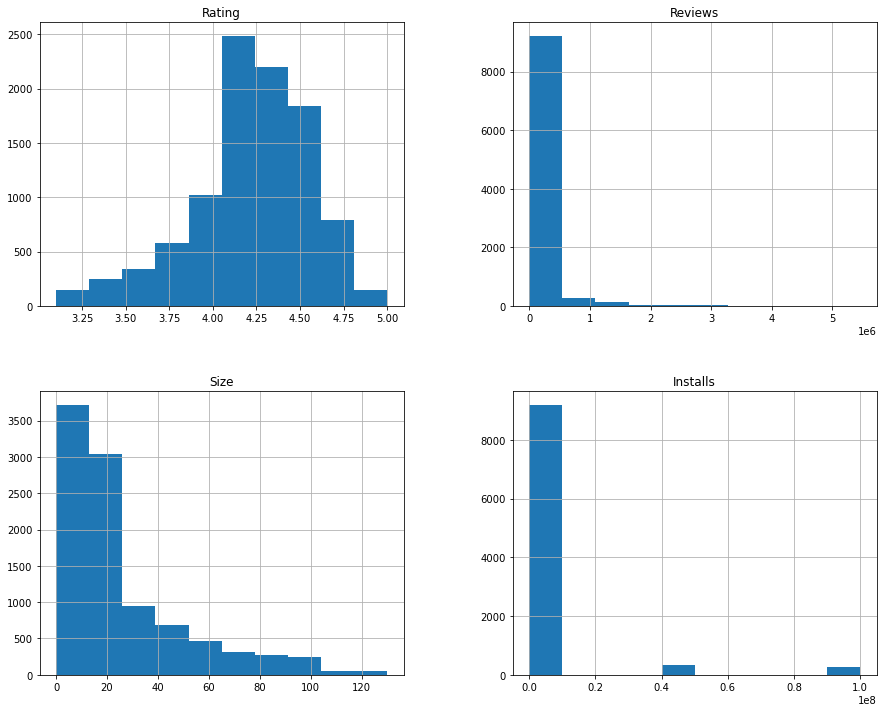

In [62]:
df_log[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(15,12));

All the continuous variable are very skewed. Major outliers with Reviews and Installs. 

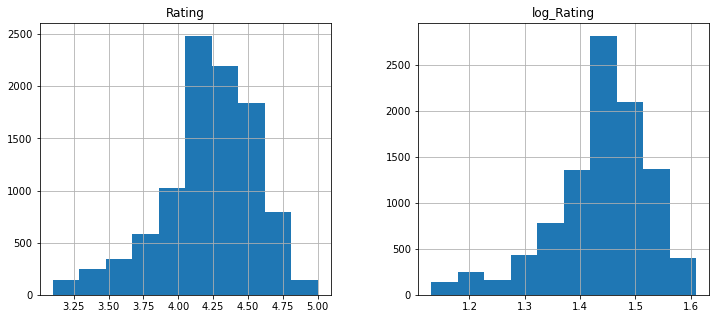

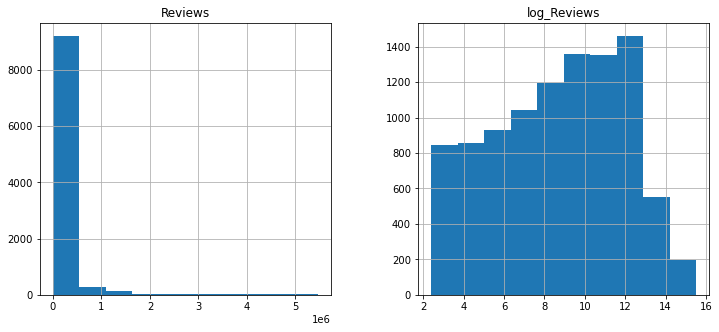

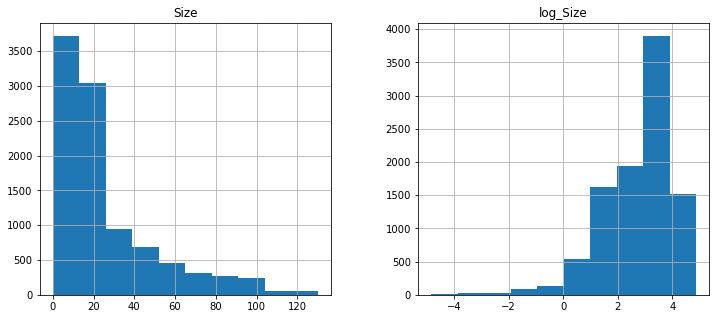

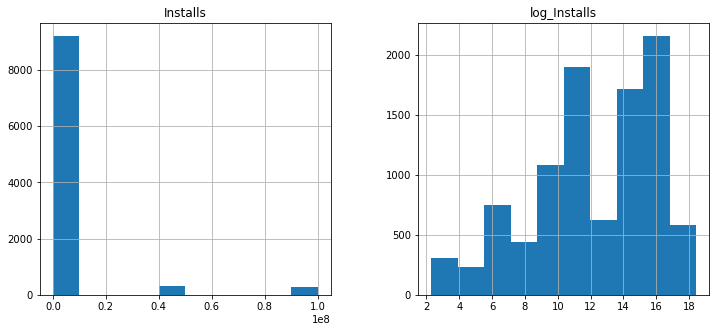

In [63]:
df_log['log_Rating'] = np.log(df_log['Rating'])
df_log[['Rating', 'log_Rating']].hist(figsize=(12,5));

df_log['log_Reviews'] = np.log(df_log['Reviews'])
df_log[['Reviews', 'log_Reviews']].hist(figsize=(12,5));

df_log['log_Size'] = np.log(df_log['Size'])
df_log[['Size', 'log_Size']].hist(figsize=(12,5));

df_log['log_Installs'] = np.log(df_log['Installs'])
df_log[['Installs', 'log_Installs']].hist(figsize=(12,5));

In [64]:
def normalize(feature):
    return round((feature - feature.mean()) / feature.std(), 4)

In [65]:
# df_log_norm = df_log[['log_Rating']]
df_log_norm = df_log[['log_Rating', 'log_Installs', 'log_Size', 'log_Reviews']]

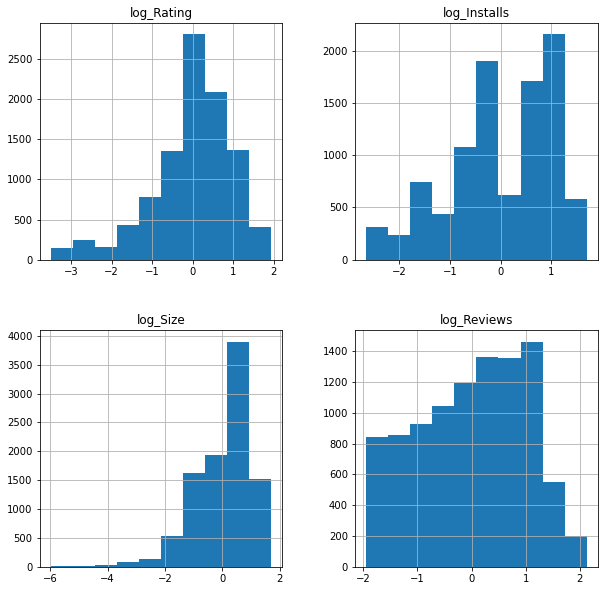

In [66]:
df_log_norm = df_log_norm.apply(normalize)
df_log_norm.hist(figsize=(10,10));

In [67]:
df_log['Rating'] = df_log_norm['log_Rating']
df_log['log_Installs'] = df_log_norm['log_Installs']
df_log['log_Size'] = df_log_norm['log_Size']
df_log['log_Reviews'] = df_log_norm['log_Reviews']

In [68]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 11821
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   9791 non-null   float64
 1   Reviews                  9791 non-null   float64
 2   Size                     9791 non-null   float64
 3   Installs                 9791 non-null   float64
 4   Content_Rating           9791 non-null   int32  
 5   Genres                   9791 non-null   int32  
 6   lastupdate               9791 non-null   int64  
 7   is_free                  9791 non-null   int64  
 8   cat_AUTO_AND_VEHICLES    9791 non-null   uint8  
 9   cat_BEAUTY               9791 non-null   uint8  
 10  cat_BOOKS_AND_REFERENCE  9791 non-null   uint8  
 11  cat_BUSINESS             9791 non-null   uint8  
 12  cat_COMICS               9791 non-null   uint8  
 13  cat_COMMUNICATION        9791 non-null   uint8  
 14  cat_DATING             

In [69]:
df_log = df_log.drop(['Rating', 'Reviews', 'Installs', 'Size'], axis=1)

# Model - Variables Transformed

## Linear Regression

In [70]:
y = df_log['log_Installs']
X = df_log.drop(['log_Installs'], axis =1)

In [71]:
X.head()

,Content_Rating,Genres,lastupdate,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,log_Rating,log_Reviews,log_Size
0,1,9,-213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.410987,-1.1182,0.1847
1,1,12,-205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.360977,-0.5576,-0.0577
2,1,9,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.547563,0.8413,-0.4353
3,4,9,-61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.504077,1.1214,0.4025
4,1,11,-49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.458615,-0.5576,-1.3352


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [73]:
outcome = 'log_Installs'
predictors = df_log.drop(labels=['log_Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, df_log).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Content_Rating+Genres+lastupdate+is_free+cat_AUTO_AND_VEHICLES+cat_BEAUTY+cat_BOOKS_AND_REFERENCE+cat_BUSINESS+cat_COMICS+cat_COMMUNICATION+cat_DATING+cat_EDUCATION+cat_ENTERTAINMENT+cat_EVENTS+cat_FAMILY+cat_FINANCE+cat_FOOD_AND_DRINK+cat_GAME+cat_GAME_ACTION+cat_GAME_ADVENTURE+cat_GAME_ARCADE+cat_GAME_BOARD+cat_GAME_CARD+cat_GAME_CASINO+cat_GAME_CASUAL+cat_GAME_EDUCATIONAL+cat_GAME_MUSIC+cat_GAME_PUZZLE+cat_GAME_RACING+cat_GAME_ROLE_PLAYING+cat_GAME_SIMULATION+cat_GAME_SPORTS+cat_GAME_STRATEGY+cat_GAME_TRIVIA+cat_GAME_WORD+cat_HEALTH_AND_FITNESS+cat_HOUSE_AND_HOME+cat_LIBRARIES_AND_DEMO+cat_LIFESTYLE+cat_MAPS_AND_NAVIGATION+cat_MEDICAL+cat_MUSIC_AND_AUDIO+cat_NEWS_AND_MAGAZINES+cat_PARENTING+cat_PERSONALIZATION+cat_PHOTOGRAPHY+cat_PRODUCTIVITY+cat_SHOPPING+cat_SOCIAL+cat_SPORTS+cat_TOOLS+cat_TRAVEL_AND_LOCAL+cat_VIDEO_PLAYERS+cat_WEATHER+log_Rating+log_Reviews+log_Size


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_Installs   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     173.9
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:10:26   Log-Likelihood:                -10455.
No. Observations:                9791   AIC:                         2.103e+04
Df Residuals:                    9733   BIC:                         2.144e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2512      0.157      1.604      0.109      -0.056       0.558
Content_Rating             -0.0009      0.008     -0.111      0.912      -0.016       0.015
Genres                      0.0007      0.000      1.525      0.127      -0.000       0.002
lastupdate               2.718e-05   1.85e-05      1.470      0.142   -9.06e-06    6.34e-05
is_free                     0.4745      0.024     19.828      0.000       0.428       0.521
cat_AUTO_AND_VEHICLES      -0.2328      0.120     -1.947      0.052      -0.467       0.002
cat_BEAUTY                 -0.1351      0.136     -0.996      0.319      -0.401       0.131
cat_BOOKS_AND_REFERENCE    -0.2782      0.100     -2.787      0.005      -0.474      -0.083
cat_BUSINESS               -0.7406      0.097     -7.663      0.000      -0.930      -0.551
cat_COMICS                 -0.1159      0.126     -0.922      0.356      -0.362       0.131
cat_COMMUNICATION          -0.2107      0.098     -2.151      0.032      -0.403      -0.019
cat_DATING                 -0.5272      0.107     -4.942      0.000      -0.736      -0.318
cat_EDUCATION               0.0578      0.104      0.556      0.578      -0.146       0.262
cat_ENTERTAINMENT           0.1561      0.106      1.479      0.139      -0.051       0.363
cat_EVENTS                 -0.5988      0.137     -4.386      0.000      -0.866      -0.331
cat_FAMILY                 -0.2916      0.092     -3.182      0.001      -0.471      -0.112
cat_FINANCE                -0.2778      0.099     -2.814      0.005      -0.471      -0.084
cat_FOOD_AND_DRINK         -0.2272      0.114     -1.997      0.046      -0.450      -0.004
cat_GAME                   -0.1068      0.092     -1.167      0.243      -0.286       0.073
cat_GAME_ACTION             0.1862      0.115      1.616      0.106      -0.040       0.412
cat_GAME_ADVENTURE          0.1406      0.120      1.174      0.240      -0.094       0.375
cat_GAME_ARCADE             0.2677      0.128      2.089      0.037       0.016       0.519
cat_GAME_BOARD              0.1966      0.140      1.404      0.160      -0.078       0.471
cat_GAME_CARD               0.0152      0.160      0.095      0.925      -0.299       0.329
cat_GAME_CASINO             0.0980      0.127      0.774      0.439      -0.150       0.346
cat_GAME_CASUAL             0.2437      0.117      2.075      0.038       0.013       0.474
cat_GAME_EDUCATIONAL        0.4845      0.112      4.319      0.000       0.265       0.704
cat_GAME_MUSIC              0.0033      0.210      0.016      0.988      -0.408       0.415
cat_GAME_PUZZLE             0.1094      0.117      0.935      0.350      -0.120       0.339
cat_GAME_RACING             0.1865      0.147      1.272      0.204      -0.101       0.474
cat_GAME_ROLE_PLAYING      -0.0050      0.119  

In [74]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 45.05%'

## KNeighbors Regression

In [76]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

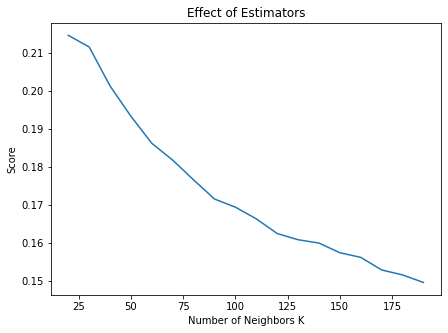

In [77]:
n_neighbors = np.arange(20, 200, 10)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [78]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

max accuracy is:  0.2146998225800616
K value to achieve this result:  20


In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

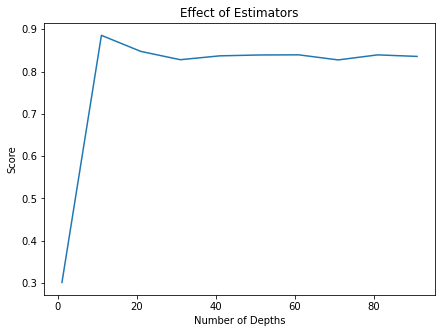

In [86]:
max_depth = np.arange(1, 100, 10)
scores = []
for m in max_depth:
    decision_tree.set_params(max_depth=m)
    decision_tree.fit(X_train, y_train)
    scores.append(decision_tree.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Depths")
plt.ylabel("Score")
plt.plot(max_depth, scores)

In [87]:
print("max accuracy is: ", max(scores))
print("Depth value to achieve this result: ", max_depth[scores.index(max(scores))])

max accuracy is:  0.8855862377971169
Depth value to achieve this result:  11


## Random Forest

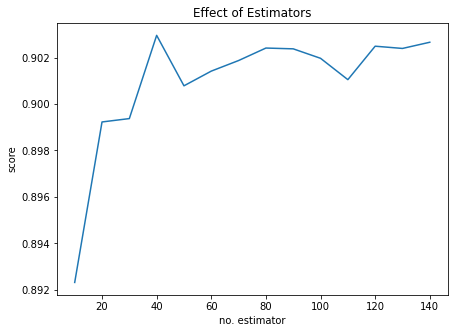

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [82]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])

max accuracy is:  0.9029605304829335
Estimators to achieve this result:  40


In [88]:
rf.score(X_train, y_train)

0.98659281763518

# Final Model

**Random Forest**
The train data has a 98% accuracy and a test data as 90% accuracy. This seems to be the best models out of the others. Though a bit of concern with overfitting the data but a few adjustments in the parameters might help with that. 

**Important Features**
Before making any recommendations let's take a look at the features that help contribute with the model success.

In [91]:
for name, importance in zip(X.columns, rf.feature_importances_):
    print(name, '=', importance)

Content_Rating = 0.0026105297035239447
Genres = 0.009138886390700707
lastupdate = 0.018757861180902047
is_free = 0.015024569766773962
cat_AUTO_AND_VEHICLES = 0.00017888278231415676
cat_BEAUTY = 9.615710498134466e-05
cat_BOOKS_AND_REFERENCE = 0.000545261781149133
cat_BUSINESS = 0.0007219059914541545
cat_COMICS = 0.0002120295220647624
cat_COMMUNICATION = 0.0004232322189459574
cat_DATING = 0.0003993406633246164
cat_EDUCATION = 0.0003816177396126762
cat_ENTERTAINMENT = 0.0003112731551829268
cat_EVENTS = 0.0002405983414027496
cat_FAMILY = 0.0022303647125985282
cat_FINANCE = 0.0015500529267120265
cat_FOOD_AND_DRINK = 0.0003785378013482971
cat_GAME = 0.0010830547091668801
cat_GAME_ACTION = 0.0010347001702776624
cat_GAME_ADVENTURE = 0.0008937338102642495
cat_GAME_ARCADE = 0.0003068128181107607
cat_GAME_BOARD = 0.00022110863775523165
cat_GAME_CARD = 7.495671193745145e-05
cat_GAME_CASINO = 0.0003002104709010538
cat_GAME_CASUAL = 0.00043307626100294713
cat_GAME_EDUCATIONAL = 0.004057225985572233


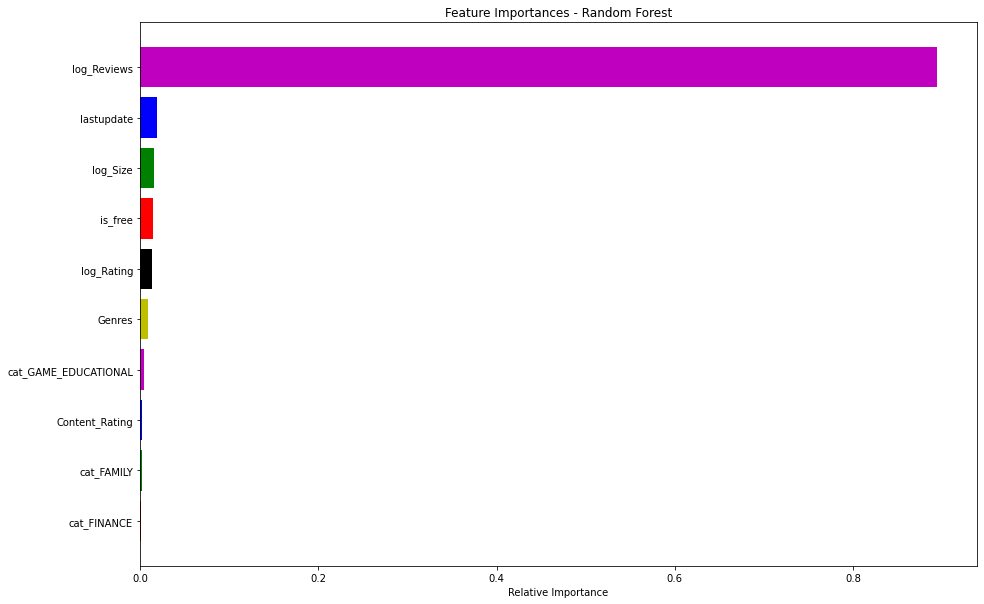

In [170]:
features = X.columns
importances = rf.feature_importances_
idx = np.argsort(importances)[-10:]
# top_ten = idx[:10]

plt.figure(figsize=(15,10))

plt.barh(range(len(idx)), importances[idx], color=['r', 'g', 'b', 'm', 'y', 'k'])
plt.title('Feature Importances - Random Forest')
plt.yticks(range(len(idx)), [features[i] for i in idx])
plt.xlabel('Relative Importance')
plt.show()

# Recommendations

After looking at the graph above you can clearly see what affects the amount of installs an app gets. Here are the top five things we should focus on:
* Reviews are crucial to getting more installs. Since word of mouth is very powerful when marketing a product, it's best to focus on getting as many people talking about your products. 
* Updating can lead to getting more people to stay with your app. Updates can help with fixes and bugs that an app might have, and people seem to love when an app has been updated recently. 'Out with the old, in with the new'.
* Size can affect if people have the necessary room to house your app. Though having a large size can represent having more content, it can possibly affect the performance on some platforms.
* 